In [74]:
pip install uncertainties

  Obtaining dependency information for uncertainties from https://files.pythonhosted.org/packages/13/f7/9d94eeea3f6475456fb5c6b72d3a3cc652c1ecd342c5491274cbfc9ebaab/uncertainties-3.1.7-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/98.4 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 98.4/98.4 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit
import uncertainties as u

In [161]:
df=pd.read_csv('SDSSD16_QSO_200.csv')
display(df)

,plate,petrorad_r,mjd,fiberid,z,zErr,zWarning,class,ra,dec,...,waveMax,waveMin,wCoverage,xFocal,yFocal,z_noqso,z_person,zErr_noqso,zOffset,zWarning_noqso
0,1736,1.22,53052,596,1.929500,0.000941,0,QSO,116.61767,44.614451,...,9191.788,3807.150,0.3773,126.21670,54.66671,0,0,0,0,0
1,1738,1.15,53051,589,1.897436,0.000161,0,QSO,136.10307,9.997530,...,9189.672,3804.521,0.3647,225.65410,33.67674,0,0,0,0,0
2,1734,1.51,53034,307,1.660203,0.000377,0,QSO,111.70769,40.091431,...,9185.440,3822.082,0.3743,-206.20550,-47.51454,0,0,0,0,0
3,1737,1.53,53055,542,0.515114,0.000119,0,QSO,118.50158,46.785306,...,9200.258,3801.894,0.3745,159.02060,98.38136,0,0,0,0,0
4,1739,1.40,53050,638,1.645876,0.000640,0,QSO,139.12397,10.133224,...,9187.556,3816.805,0.3699,243.34120,-41.39991,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1774,1.31,53759,525,1.776615,0.000279,0,QSO,201.80474,14.935568,...,9210.856,3813.292,0.3607,65.38879,123.27150,0,0,0,0,0
196,1774,1.21,53759,529,0.252987,0.000051,0,QSO,201.81939,15.103774,...,9210.856,3814.170,0.3594,68.43923,159.93680,0,0,0,0,0
197,1774,1.22,53759,541,0.379699,0.000030,0,QSO,202.27578,14.719729,...,9210.856,3814.170,0.3601,164.67450,76.55282,0,0,0,0,0
198,1581,1.56,53149,52,0.242135,0.000023,0,QSO,236.40263,31.403800,...,9208.735,3802.770,0.3809,146.23860,-254.59250,0,0,0,0,0


In [162]:
filtered=df.loc[:,~df.isin([-9999,-1,0,1,2,3,26,1017]).all()]
filtered=filtered.dropna(axis=1,how='all')
drop=['class','chunk','firstRelease','instrument','programname','sourceType']
filt_df=filtered.drop(columns=drop,errors='ignore')
print(filt_df)

     plate  petrorad_r    mjd  fiberid         z      zErr         ra  \
0     1736        1.22  53052      596  1.929500  0.000941  116.61767   
1     1738        1.15  53051      589  1.897436  0.000161  136.10307   
2     1734        1.51  53034      307  1.660203  0.000377  111.70769   
3     1737        1.53  53055      542  0.515114  0.000119  118.50158   
4     1739        1.40  53050      638  1.645876  0.000640  139.12397   
..     ...         ...    ...      ...       ...       ...        ...   
195   1774        1.31  53759      525  1.776615  0.000279  201.80474   
196   1774        1.21  53759      529  0.252987  0.000051  201.81939   
197   1774        1.22  53759      541  0.379699  0.000030  202.27578   
198   1581        1.56  53149       52  0.242135  0.000023  236.40263   
199   1583        1.22  52941      332  1.892373  0.510621  118.20653   

           dec  anyAndMask  anyOrMask  ...   theta_3    theta_4    theta_5  \
0    44.614451    25165824  194969600  ...  0

±

In [163]:
x_val=[]
y_val=[]
y_errors=[]
for index, row in filt_df.iterrows():
    d=row['z']
    r=row['petrorad_r']
    Q=1
    s=0.82
    n=u.ufloat(1.25,0.53)
    d=u.ufloat(d,0)
    r=u.ufloat(r,0)
    #eq=(d/r)<15*(Q**0.5)*(s/n)
    lhs=(d/r)
    rhs=15*(Q**0.5)*(s/n)
    numerical_result=lhs-rhs
    x_val.append(index)
    y_val.append(numerical_result.nominal_value)
    y_errors.append(numerical_result.std_dev)

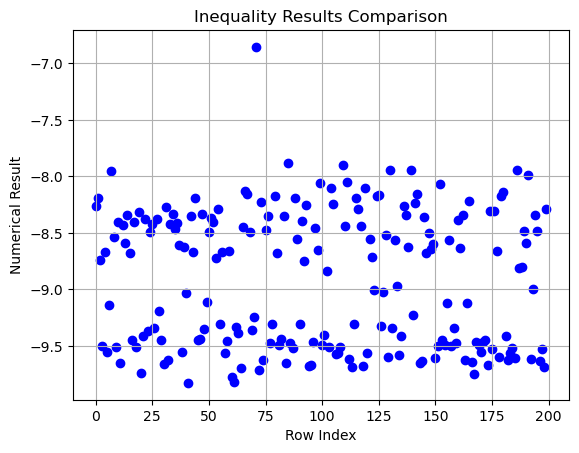

In [213]:
plt.figure()
plt.scatter(x_val,y_val,color='blue')
plt.xlabel('Row Index')
plt.ylabel('Numerical Result')
plt.title('Inequality Results Comparison')
plt.grid('True')
plt.show()

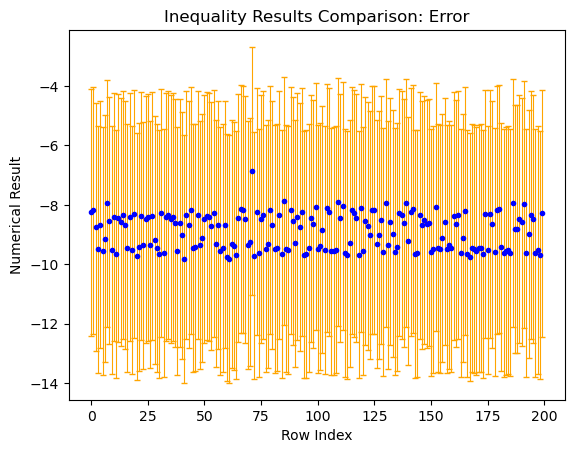

In [214]:
plt.figure()
plt.errorbar(x_val,y_val,yerr=y_errors,fmt='.',ecolor='orange',color='blue',capsize=2,linewidth=0.8)
plt.xlabel('Row Index')
plt.ylabel('Numerical Result')
plt.title('Inequality Results Comparison: Error')
plt.show()